<a href="https://colab.research.google.com/github/ushika111/cupcake/blob/master/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 3.

This is week 3

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data =[34, 5, 8, 10, 15]
print(data)

[34, 5, 8, 10, 15]


In [4]:
mean = np.mean(data)
print(mean)

14.4


In [10]:
import pandas as pd
df=pd.read_csv("wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [15]:
from sklearn.model_selection import train_test_split

x = df[['density','sulphates','residual_sugar']]
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 4)

In [21]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test, predictions)
print(f"Correctly classified instances: {accuracy_score(y_test, predictions, normalize=False)}")
print(f"Accuracy: {accuracy:.4f}")
results = []
for k in range (1,51,2):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train, y_train)
  predictions = classifier.predict(x_test)
  accuracy = accuracy_score(y_test, predictions)
  print(f"k ={k}, Accuracy = {accuracy:.4f}")
  results.append([k, accuracy])

Correctly classified instances: 914.0
Accuracy: 0.4687
k =1, Accuracy = 0.5533
k =3, Accuracy = 0.4687
k =5, Accuracy = 0.4754
k =7, Accuracy = 0.4708
k =9, Accuracy = 0.4672
k =11, Accuracy = 0.4585
k =13, Accuracy = 0.4446
k =15, Accuracy = 0.4497
k =17, Accuracy = 0.4467
k =19, Accuracy = 0.4426
k =21, Accuracy = 0.4410
k =23, Accuracy = 0.4379
k =25, Accuracy = 0.4431
k =27, Accuracy = 0.4436
k =29, Accuracy = 0.4451
k =31, Accuracy = 0.4487
k =33, Accuracy = 0.4462
k =35, Accuracy = 0.4410
k =37, Accuracy = 0.4369
k =39, Accuracy = 0.4333
k =41, Accuracy = 0.4405
k =43, Accuracy = 0.4349
k =45, Accuracy = 0.4277
k =47, Accuracy = 0.4328
k =49, Accuracy = 0.4262


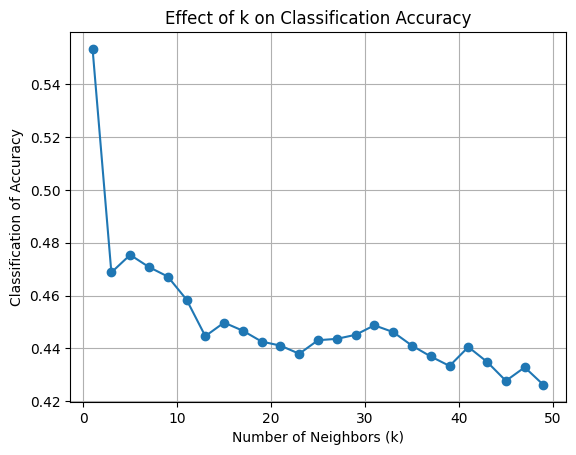

In [23]:
results_df = pd.DataFrame(results, columns = ["k","accuracy"])
plt.plot(results_df.k, results_df.accuracy, marker = 'o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Classification of Accuracy")
plt.title("Effect of k on Classification Accuracy")
plt.grid(True)
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('balloons.csv')
df.head()

,Color,Size,Act,Age,Inflated
0,yellow,small,stretch,adult,t
1,yellow,small,stretch,adult,t
2,yellow,small,stretch,child,f
3,yellow,small,dip,adult,f
4,yellow,small,dip,child,f


In [26]:
label_encoders = {}
for column in df.columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le
  x = df.drop(columns = ['Inflated'])
  y = df['Inflated']

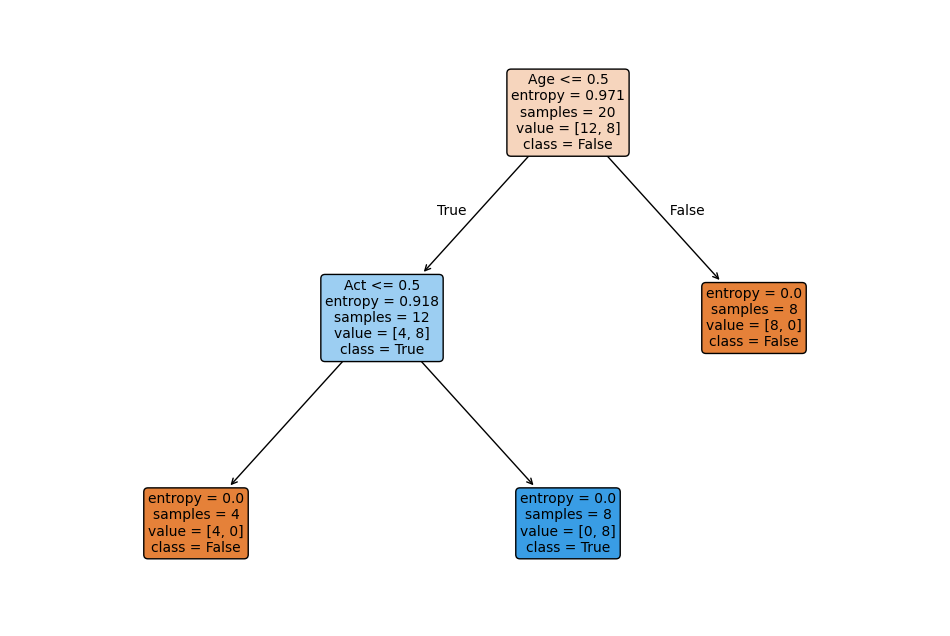

In [27]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)
plt.figure(figsize = (12,8))
plot_tree(dt, feature_names=x.columns, class_names = ['False','True'], filled =True, rounded=True, fontsize = 10)
plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

bank_df = pd.read_csv('bank.csv', delimiter = ';')
print("Variable Names:", bank_df.columns.tolist())
bank_df.head()

Variable Names: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


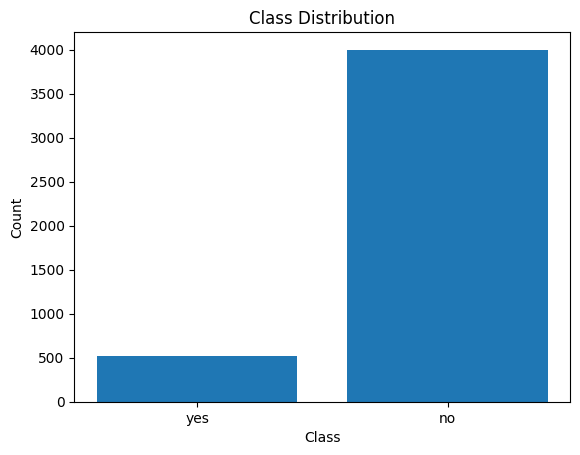

In [30]:
y = bank_df['y']
plt.bar(['yes','no'],[sum(y == 'yes'),sum(y == 'no')])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [36]:
for col in bank_df.columns:
  bank_df[col] = pd.factorize(bank_df[col])[0]
  y = bank_df['y']
  x = bank_df.drop(columns = ['y'])
  x.head()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)
rfc = RandomForestClassifier(n_estimators=500, random_state=42)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy Score: 0.8885941644562334
Confusion Matrix:
 [[989  17]
 [109  16]]


In [39]:
probabilities = rfc.predict_proba(x_test)[:,1]
print("Accuracy Score:", accuracy_score(y_test, predictions))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\n Classification Report:\n", classification_report(y_test, predictions))
print("\n ROC-AUC Score:", roc_auc_score(y_test, probabilities))

Accuracy Score: 0.8885941644562334

 Confusion Matrix:
 [[989  17]
 [109  16]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1006
           1       0.48      0.13      0.20       125

    accuracy                           0.89      1131
   macro avg       0.69      0.56      0.57      1131
weighted avg       0.85      0.89      0.86      1131


 ROC-AUC Score: 0.8087554671968191


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

bank_df = pd.read_csv('bank.csv', delimiter = ';')
y = bank_df['y']
x = bank_df.drop(columns = ['y'])

# Factorize all categorical columns in x
for col in x.columns:
  if x[col].dtype == 'object':
    x[col] = pd.factorize(x[col])[0]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)
brf = BalancedRandomForestClassifier(n_estimators=500, random_state=42)
brf.fit(x_train, y_train)

BalancedRandomForestClassifier(n_estimators=500, random_state=42)

In [47]:
 predictions = brf.predict(x_test)
 probabilities = brf.predict_proba(x_test)[:,1]
 print("Accuracy Score:", accuracy_score(y_test, predictions))
 print("\n Confusion Matrix:\n", confusion_matrix(y_test, predictions))
 print("\n Classification Report:\n", classification_report(y_test, predictions))
 print("\n ROC-AUC Score:", roc_auc_score(y_test, probabilities))

Accuracy Score: 0.8673740053050398

 Confusion Matrix:
 [[882 124]
 [ 26  99]]

 Classification Report:
               precision    recall  f1-score   support

          no       0.97      0.88      0.92      1006
         yes       0.44      0.79      0.57       125

    accuracy                           0.87      1131
   macro avg       0.71      0.83      0.75      1131
weighted avg       0.91      0.87      0.88      1131


 ROC-AUC Score: 0.91441351888668
